In [47]:
# Libraries and dependencies
import os
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import pandas as pd 
from pathlib import Path
from dotenv import load_dotenv
import hvplot.pandas
import seaborn as sns
%matplotlib inline

In [3]:
# Loading .env 
load_dotenv()

True

In [4]:
# Set Alpaca API key/ secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Conection
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [19]:
# Gathering data with the api conection and creating a dataframe
# Set ticekers
crypto_tickers = ['BTC-USD','ETH-USD','BNB-USD','ADA-USD','XRP-USD','DOGE-USD','LTC-USD','LINK-USD','BCH-USD','XLM-USD']
stock_tickers = ["MSFT", "AAPL", "TSLA", "AMZN", "NVDA", "GOOG", "FB", "ADBE", "NFLX", "PYPL"]

# Setting time frame to 1D
timeframe = "1D"

# Set the start/ end datetime of 3 years from today 
start_date = pd.Timestamp('2014-1-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp.today(tz='America/New_York').isoformat()

# Set limit of rows to the max to maximaize
limit_rows = 1000

# Get the 2 years data frame for stocks
stocks_df = api.get_barset(
    stock_tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = limit_rows).df

# Visualazing the data 
stocks_df.head()

AAPL                                        ADBE  \
                             open    high     low   close      volume    open   
time                                                                            
2017-11-28 00:00:00-05:00     NaN     NaN     NaN     NaN         NaN     NaN   
2017-11-29 00:00:00-05:00     NaN     NaN     NaN     NaN         NaN     NaN   
2017-11-30 00:00:00-05:00  170.43  172.14  168.44  171.75  24465789.0  178.36   
2017-12-01 00:00:00-05:00  169.90  171.67  168.50  171.00  28912970.0  179.51   
2017-12-04 00:00:00-05:00  172.47  172.62  169.63  169.76  24866974.0  180.34   

                                                                ...   PYPL  \
                             high       low   close     volume  ...   open   
time                                                            ...          
2017-11-28 00:00:00-05:00     NaN       NaN     NaN        NaN  ...    NaN   
2017-11-29 00:00:00-05:00     NaN       NaN     NaN        NaN  ...    NaN   
2017-11-30 00:00:00-05:00  181.67  176.5501  181.42  1916771.0  ...  73.77   
2017-12-01 00:00:00-05:00  182.00  177.1300  179.50  2121033.0  ...  75.22   
2017-12-04 00:00:00-05:00  180.62  168.4300  168.44  4475269.0  ...  75.65   

                                                                TSLA           \
                              high    low  close      volume    open     high   
time                                                                            
2017-11-28 00:00:00-05:00      NaN    NaN    NaN         NaN     NaN      NaN   
2017-11-29 00:00:00-05:00      NaN    NaN    NaN         NaN     NaN      NaN   
2017-11-30 00:00:00-05:00  75.8700  73.54  75.64  11120784.0  308.56  310.700   
2017-12-01 00:00:00-05:00  76.4400  74.26  75.30  11455938.0  305.44  310.320   
2017-12-04 00:00:00-05:00  75.7439  68.61  70.93  23534387.0  306.51  308.265   

                                                      
                              low   close     volume  
time                                                  
2017-11-28 00:00:00-05:00     NaN     NaN        NaN  
2017-11-29 00:00:00-05:00     NaN     NaN        NaN  
2017-11-30 00:00:00-05:00  304.54  308.95  3399245.0  
2017-12-01 00:00:00-05:00  305.05  306.53  3411656.0  
2017-12-04 00:00:00-05:00  300.61  305.23  4799442.0  

[5 rows x 50 columns]

In [20]:
#Create for loop to read in Change % data and clean column of string values and convert to float /100
crypto_daily_df = pd.DataFrame()
for crypto in crypto_tickers:
    df = pd.read_csv(Path(f"Historical_Data/{crypto}.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)
    crypto_daily_df[f'{crypto}'] = df['Close'].pct_change()

crypto_daily_df=crypto_daily_df.dropna()
display(crypto_daily_df.head())
display(crypto_daily_df.tail())

BTC-USD   ETH-USD   BNB-USD   ADA-USD   XRP-USD  DOGE-USD  \
Date                                                                     
2017-10-02  0.001267 -0.016081  0.287017  0.038568 -0.018670  0.000923   
2017-10-03 -0.020829 -0.016848 -0.073279 -0.197285  0.003168  0.021198   
2017-10-04 -0.020410  0.000667 -0.120404  0.053565  0.056345 -0.075812   
2017-10-05  0.023420  0.010951  0.048087 -0.020154  0.103560 -0.022461   
2017-10-06  0.009796  0.043010 -0.058731 -0.137280 -0.012560  0.054945   

             LTC-USD  LINK-USD   BCH-USD   XLM-USD  
Date                                                
2017-10-02 -0.021401 -0.182940  0.014534 -0.053039  
2017-10-03 -0.019230 -0.031483 -0.040384 -0.043049  
2017-10-04 -0.018149  0.149988 -0.113144 -0.044582  
2017-10-05  0.005253  0.023095 -0.007524  0.229938  
2017-10-06  0.008721  0.170284  0.020419  0.262555

BTC-USD   ETH-USD   BNB-USD   ADA-USD   XRP-USD  DOGE-USD  \
Date                                                                     
2021-11-13  0.004888 -0.003354  0.037440  0.003587  0.002172  0.008835   
2021-11-14  0.015470 -0.005396  0.001252 -0.005967 -0.002803  0.004608   
2021-11-15 -0.029159 -0.014883 -0.027453 -0.012380 -0.014493 -0.024278   
2021-11-16 -0.053441 -0.074852 -0.068282 -0.068641 -0.068669 -0.075157   
2021-11-17  0.003437  0.016893 -0.019888 -0.000903  0.004910  0.001003   

             LTC-USD  LINK-USD   BCH-USD   XLM-USD  
Date                                                
2021-11-13  0.025977 -0.005857 -0.001985 -0.001484  
2021-11-14  0.077159 -0.008462  0.017673 -0.003924  
2021-11-15 -0.054833 -0.052280 -0.019303 -0.003942  
2021-11-16 -0.122407 -0.087025 -0.099358 -0.084811  
2021-11-17 -0.004750 -0.001094 -0.006567  0.006798

In [21]:
# Cleaning the data from stocks
clean_df_stocks = stocks_df.dropna()#.isnull().sum()
clean_df_stocks.head()

AAPL                                        \
                             open      high     low   close      volume   
time                                                                      
2017-11-30 00:00:00-05:00  170.43  172.1400  168.44  171.75  24465789.0   
2017-12-01 00:00:00-05:00  169.90  171.6700  168.50  171.00  28912970.0   
2017-12-04 00:00:00-05:00  172.47  172.6200  169.63  169.76  24866974.0   
2017-12-05 00:00:00-05:00  169.33  171.5200  168.40  169.65  21377668.0   
2017-12-06 00:00:00-05:00  167.50  170.2047  166.46  169.05  21545899.0   

                             ADBE                                       ...  \
                             open    high       low   close     volume  ...   
time                                                                    ...   
2017-11-30 00:00:00-05:00  178.36  181.67  176.5501  181.42  1916771.0  ...   
2017-12-01 00:00:00-05:00  179.51  182.00  177.1300  179.50  2121033.0  ...   
2017-12-04 00:00:00-05:00  180.34  180.62  168.4300  168.44  4475269.0  ...   
2017-12-05 00:00:00-05:00  167.69  171.78  165.6800  167.54  3616675.0  ...   
2017-12-06 00:00:00-05:00  166.79  173.96  165.7500  173.51  2570815.0  ...   

                            PYPL                                       TSLA  \
                            open     high    low  close      volume    open   
time                                                                          
2017-11-30 00:00:00-05:00  73.77  75.8700  73.54  75.64  11120784.0  308.56   
2017-12-01 00:00:00-05:00  75.22  76.4400  74.26  75.30  11455938.0  305.44   
2017-12-04 00:00:00-05:00  75.65  75.7439  68.61  70.93  23534387.0  306.51   
2017-12-05 00:00:00-05:00  69.81  72.7500  69.61  71.17  13591048.0  302.00   
2017-12-06 00:00:00-05:00  70.89  73.2000  70.83  73.14   6773786.0  300.10   

                                                               
                              high     low   close     volume  
time                                                           
2017-11-30 00:00:00-05:00  310.700  304.54  308.95  3399245.0  
2017-12-01 00:00:00-05:00  310.320  305.05  306.53  3411656.0  
2017-12-04 00:00:00-05:00  308.265  300.61  305.23  4799442.0  
2017-12-05 00:00:00-05:00  308.000  301.00  303.70  3214323.0  
2017-12-06 00:00:00-05:00  313.390  300.00  313.27  5068966.0  

[5 rows x 50 columns]

In [22]:
#Calculate the daily change for the stocks_df using for loop
stocks_daily_df = pd.DataFrame()
for stocks in stock_tickers:
    stocks_daily_df[f'{stocks}'] = clean_df_stocks[stocks]['close'].pct_change().dropna()

display(stocks_daily_df.head())
display(stocks_daily_df.tail())

MSFT      AAPL      TSLA      AMZN      NVDA  \
time                                                                          
2017-12-01 00:00:00-05:00  0.002022 -0.004367 -0.007833 -0.012545 -0.014556   
2017-12-04 00:00:00-05:00 -0.037859 -0.007251 -0.004241 -0.023997 -0.055758   
2017-12-05 00:00:00-05:00  0.006414 -0.000648 -0.005013  0.006729  0.005584   
2017-12-06 00:00:00-05:00  0.014708 -0.003537  0.031511  0.009951  0.008237   
2017-12-07 00:00:00-05:00 -0.003624  0.001656 -0.006416  0.006123  0.014447   

                               GOOG        FB      ADBE      NFLX      PYPL  
time                                                                         
2017-12-01 00:00:00-05:00 -0.010872 -0.012193 -0.010583 -0.003733 -0.004495  
2017-12-04 00:00:00-05:00 -0.010824 -0.020115 -0.061616 -0.014933 -0.058035  
2017-12-05 00:00:00-05:00  0.006257  0.007931 -0.005343  0.001032  0.003384  
2017-12-06 00:00:00-05:00  0.013471  0.018805  0.035633  0.005862  0.027680  
2017-12-07 00:00:00-05:00  0.012094  0.023398  0.006513 -0.000594  0.007520

MSFT      AAPL      TSLA      AMZN      NVDA  \
time                                                                          
2021-11-12 00:00:00-05:00  0.012844  0.014268 -0.028218  0.015410 -0.000033   
2021-11-15 00:00:00-05:00 -0.001930  0.000067 -0.019168  0.005593 -0.012043   
2021-11-16 00:00:00-05:00  0.010414  0.006667  0.040298 -0.001407  0.005412   
2021-11-17 00:00:00-05:00 -0.001266  0.017550  0.033057  0.002305 -0.030792   
2021-11-18 00:00:00-05:00  0.006251  0.027595  0.006398  0.041481  0.082168   

                               GOOG        FB      ADBE      NFLX      PYPL  
time                                                                         
2021-11-12 00:00:00-05:00  0.019518  0.040122  0.022436  0.038363  0.030837  
2021-11-15 00:00:00-05:00 -0.001283  0.019683  0.003695 -0.004571  0.020695  
2021-11-16 00:00:00-05:00 -0.002309 -0.013463  0.016302  0.011758  0.014583  
2021-11-17 00:00:00-05:00 -0.000074 -0.006182 -0.000149  0.006095 -0.043307  
2021-11-18 00:00:00-05:00  0.011008 -0.006220  0.000388 -0.014024 -0.028256

In [23]:
#change df to have the same datetime format and tz and create a merged_df 
#stocks_daily_df.index = stocks_daily_df.index.tz_convert(None)
stocks_daily_df.index = pd.to_datetime(stocks_daily_df.index).date
crypto_daily_df.index = pd.to_datetime(crypto_daily_df.index).date
daily_df_merged = stocks_daily_df.merge(crypto_daily_df, how='inner', left_index=True, right_index=True)
daily_df_merged

MSFT      AAPL      TSLA      AMZN      NVDA      GOOG  \
2017-12-01  0.002022 -0.004367 -0.007833 -0.012545 -0.014556 -0.010872   
2017-12-04 -0.037859 -0.007251 -0.004241 -0.023997 -0.055758 -0.010824   
2017-12-05  0.006414 -0.000648 -0.005013  0.006729  0.005584  0.006257   
2017-12-06  0.014708 -0.003537  0.031511  0.009951  0.008237  0.013471   
2017-12-07 -0.003624  0.001656 -0.006416  0.006123  0.014447  0.012094   
...              ...       ...       ...       ...       ...       ...   
2021-11-11  0.004928 -0.000270 -0.003980 -0.002770  0.032303  0.000907   
2021-11-12  0.012844  0.014268 -0.028218  0.015410 -0.000033  0.019518   
2021-11-15 -0.001930  0.000067 -0.019168  0.005593 -0.012043 -0.001283   
2021-11-16  0.010414  0.006667  0.040298 -0.001407  0.005412 -0.002309   
2021-11-17 -0.001266  0.017550  0.033057  0.002305 -0.030792 -0.000074   

                  FB      ADBE      NFLX      PYPL   BTC-USD   ETH-USD  \
2017-12-01 -0.012193 -0.010583 -0.003733 -0.004495  0.072506  0.043448   
2017-12-04 -0.020115 -0.061616 -0.014933 -0.058035  0.029497  0.009340   
2017-12-05  0.007931 -0.005343  0.001032  0.003384  0.022261 -0.014723   
2017-12-06  0.018805  0.035633  0.005862  0.027680  0.199283 -0.074885   
2017-12-07  0.023398  0.006513 -0.000594  0.007520  0.252472  0.013579   
...              ...       ...       ...       ...       ...       ...   
2021-11-11  0.000305 -0.006396  0.016231 -0.012754 -0.000697  0.020321   
2021-11-12  0.040122  0.022436  0.038363  0.030837 -0.012225 -0.013375   
2021-11-15  0.019683  0.003695 -0.004571  0.020695 -0.029159 -0.014883   
2021-11-16 -0.013463  0.016302  0.011758  0.014583 -0.053441 -0.074852   
2021-11-17 -0.006182 -0.000149  0.006095 -0.043307  0.003437  0.016893   

             BNB-USD   ADA-USD   XRP-USD  DOGE-USD   LTC-USD  LINK-USD  \
2017-12-01  0.036686  0.095668  0.019217  0.033189  0.120830  0.043189   
2017-12-04  0.118725  0.030825  0.004011  0.107962  0.029359 -0.004544   
2017-12-05  0.041586 -0.061691 -0.029459  0.006496 -0.017643  0.367173   
2017-12-06 -0.002932 -0.075686 -0.055087  0.074223 -0.019971 -0.071069   
2017-12-07  0.074298 -0.104702 -0.041803  0.021404 -0.020524 -0.108056   
...              ...       ...       ...       ...       ...       ...   
2021-11-11  0.023752 -0.007745  0.020941  0.021345  0.006980  0.014398   
2021-11-12 -0.005159 -0.019064 -0.023810 -0.006712 -0.043820 -0.016409   
2021-11-15 -0.027453 -0.012380 -0.014493 -0.024278 -0.054833 -0.052280   
2021-11-16 -0.068282 -0.068641 -0.068669 -0.075157 -0.122407 -0.087025   
2021-11-17 -0.019888 -0.000903  0.004910  0.001003 -0.004750 -0.001094   

             BCH-USD   XLM-USD  
2017-12-01  0.052454  0.233454  
2017-12-04  0.010892  0.096310  
2017-12-05 -0.047606  0.265475  
2017-12-06 -0.047774  0.227480  
2017-12-07 -0.069345 -0.122515  
...              ...       ...  
2021-11-11  0.015449  0.017703  
2021-11-12 -0.012868 -0.032127  
2021-11-15 -0.019303 -0.003942  
2021-11-16 -0.099358 -0.084811  
2021-11-17 -0.006567  0.006798  

[996 rows x 20 columns]

In [24]:
#Calculate Standard Deviation for stocks and cryptos
stocks_standard_deviation = stocks_daily_df.std()
crypto_standard_deviation = crypto_daily_df.std()
display(stocks_standard_deviation)
display(crypto_standard_deviation)

MSFT    0.018800
AAPL    0.031323
TSLA    0.047671
AMZN    0.019731
NVDA    0.038572
GOOG    0.018355
FB      0.022727
ADBE    0.021690
NFLX    0.025510
PYPL    0.024238
dtype: float64

BTC-USD     0.041397
ETH-USD     0.051699
BNB-USD     0.066120
ADA-USD     0.081059
XRP-USD     0.071298
DOGE-USD    0.107422
LTC-USD     0.057913
LINK-USD    0.076877
BCH-USD     0.070053
XLM-USD     0.074598
dtype: float64

In [25]:
#calculate annual standard deviation for stocks and cryptos
trading_days = 252
stocks_annual_std = stocks_standard_deviation * trading_days ** (1/2)
crypto_annual_std = crypto_standard_deviation * trading_days ** (1/2)
display(stocks_annual_std)
display(crypto_annual_std)

MSFT    0.298434
AAPL    0.497231
TSLA    0.756761
AMZN    0.313223
NVDA    0.612316
GOOG    0.291376
FB      0.360775
ADBE    0.344315
NFLX    0.404963
PYPL    0.384774
dtype: float64

BTC-USD     0.657151
ETH-USD     0.820703
BNB-USD     1.049629
ADA-USD     1.286780
XRP-USD     1.131826
DOGE-USD    1.705264
LTC-USD     0.919342
LINK-USD    1.220382
BCH-USD     1.112051
XLM-USD     1.184201
dtype: float64

In [26]:
# Calculate the annual average return data for stocks and crypto
stocks_annual_avg_return = stocks_daily_df.mean()* trading_days
crypto_annual_avg_return = crypto_daily_df.mean()*trading_days

display(stocks_annual_avg_return)
display(crypto_annual_avg_return)

MSFT    0.398834
AAPL    0.187463
TSLA    0.710400
AMZN    0.338498
NVDA    0.394928
GOOG    0.316264
FB      0.229583
ADBE    0.389936
NFLX    0.408211
PYPL    0.320455
dtype: float64

BTC-USD     0.656061
ETH-USD     0.786400
BNB-USD     1.516951
ADA-USD     1.426798
XRP-USD     0.870135
DOGE-USD    1.865876
LTC-USD     0.655950
LINK-USD    1.431177
BCH-USD     0.658938
XLM-USD     1.174499
dtype: float64

In [27]:
# Calculate the annualized Sharpe Ratios for stocks and crypto
stocks_annual_sharpe_ratio = stocks_annual_avg_return/stocks_annual_std
crypto_annual_sharpe_ratio = crypto_annual_avg_return/crypto_annual_std

display(stocks_annual_sharpe_ratio)
display(crypto_annual_sharpe_ratio)

MSFT    1.336422
AAPL    0.377013
TSLA    0.938738
AMZN    1.080693
NVDA    0.644975
GOOG    1.085414
FB      0.636360
ADBE    1.132498
NFLX    1.008020
PYPL    0.832840
dtype: float64

BTC-USD     0.998342
ETH-USD     0.958203
BNB-USD     1.445226
ADA-USD     1.108813
XRP-USD     0.768788
DOGE-USD    1.094186
LTC-USD     0.713499
LINK-USD    1.172728
BCH-USD     0.592543
XLM-USD     0.991807
dtype: float64

In [29]:
#for loop to calculate covariance (30day) for each crypto to each stock
covariance_df = pd.DataFrame()

for stock in stock_tickers:
    for crypto in crypto_tickers:
        covariance_df[f'{crypto} cov {stock}'] = daily_df_merged[crypto].rolling(window=30).cov(daily_df_merged[stock])
        
covariance_df = covariance_df.dropna()
display(covariance_df.head())

BTC-USD cov MSFT  ETH-USD cov MSFT  BNB-USD cov MSFT  \
2018-01-16          0.000244          0.000201          0.000430   
2018-01-17          0.000222          0.000165          0.000413   
2018-01-18          0.000251          0.000151          0.000516   
2018-01-19          0.000249          0.000157          0.000517   
2018-01-22          0.000142          0.000162          0.000476   

            ADA-USD cov MSFT  XRP-USD cov MSFT  DOGE-USD cov MSFT  \
2018-01-16         -0.000025         -0.000153           0.000255   
2018-01-17         -0.000043         -0.000137           0.000316   
2018-01-18         -0.000047         -0.000271           0.000436   
2018-01-19         -0.000030         -0.000239           0.000442   
2018-01-22         -0.000039         -0.000235           0.000384   

            LTC-USD cov MSFT  LINK-USD cov MSFT  BCH-USD cov MSFT  \
2018-01-16          0.000557           0.000155         -0.000101   
2018-01-17          0.000538           0.000099         -0.000121   
2018-01-18          0.000551           0.000070         -0.000130   
2018-01-19          0.000558           0.000019         -0.000121   
2018-01-22          0.000537          -0.000001         -0.000148   

            XLM-USD cov MSFT  ...  BTC-USD cov PYPL  ETH-USD cov PYPL  \
2018-01-16          0.000344  ...          0.000443          0.000083   
2018-01-17          0.000360  ...          0.000430          0.000043   
2018-01-18          0.000421  ...          0.000478          0.000022   
2018-01-19          0.000407  ...          0.000480          0.000016   
2018-01-22          0.000338  ...          0.000334          0.000099   

            BNB-USD cov PYPL  ADA-USD cov PYPL  XRP-USD cov PYPL  \
2018-01-16          0.000686          0.000175      6.153533e-07   
2018-01-17          0.000660          0.000167      4.625914e-06   
2018-01-18          0.000808          0.000164     -1.682963e-04   
2018-01-19          0.000808          0.000149     -1.971835e-04   
2018-01-22          0.000860          0.000248     -6.911745e-05   

            DOGE-USD cov PYPL  LTC-USD cov PYPL  LINK-USD cov PYPL  \
2018-01-16           0.000121     -5.753077e-05          -0.000038   
2018-01-17           0.000203     -5.696543e-05          -0.000102   
2018-01-18           0.000389     -3.337783e-05          -0.000134   
2018-01-19           0.000383     -3.911002e-05          -0.000095   
2018-01-22           0.000348      1.265949e-07          -0.000024   

            BCH-USD cov PYPL  XLM-USD cov PYPL  
2018-01-16         -0.000378          0.000657  
2018-01-17         -0.000396          0.000722  
2018-01-18         -0.000412          0.000817  
2018-01-19         -0.000418          0.000823  
2018-01-22         -0.000353          0.000676  

[5 rows x 100 columns]

In [30]:
# Plot daily returns for stocks and crypto
daily_df_merged.hvplot.box(
    rot=90,
    title='Daily Returns Data for the Top 10 Tech Stocks and Cryptos - 2/2/18 to 4/23/21')

:BoxWhisker   [Variable]   (value)

In [31]:
# Plot standard deviation for stocks and crypto
stocks_sd_plot = stocks_standard_deviation.hvplot.bar(
    xlabel='Stock/Crypto',
    rot=90,
    color='blue',    
    title='Standard Deviation for the Top 10 Tech Stocks and Cryptos - 2/2/18 to 4/23/21')
crypto_sd_plot = crypto_standard_deviation.hvplot.bar(
    rot=90,
    color='blue')

stocks_sd_plot * crypto_sd_plot

:Overlay
   .Bars.A_0.I  :Bars   [index]   (0)
   .Bars.A_0.II :Bars   [index]   (0)

In [32]:
# Plot annualized Sharpe Ratios for stocks and crypto
stocks_sharpe_plot = stocks_annual_sharpe_ratio.hvplot.bar(
    xlabel='Stock/Crypto',
    rot=90,
    color='blue',    
    title='Sharpe Ratios for the Top 10 Tech Stocks and Cryptos - 2/2/18 to 4/23/21')
crypto_sharpe_plot = crypto_annual_sharpe_ratio.hvplot.bar(
    rot=90,
    color='blue')

stocks_sharpe_plot * crypto_sharpe_plot

:Overlay
   .Bars.A_0.I  :Bars   [index]   (0)
   .Bars.A_0.II :Bars   [index]   (0)

In [33]:
#create function to group cov data by ticker stock or crypto.
def s_value(df, listmain, listrun):
    plots = {}
    for name in listmain:
        value = []
        for out in listrun:
            string = f"{name} cov {out}"
            value.append(string)
        plots[f"{name}"] = df[value].hvplot.line(title=f'{name} Covariance', xlabel='Date', ylabel='Covariance')
    return plots

In [34]:
#call created function
cov_plot = s_value(covariance_df, crypto_tickers, stock_tickers)

In [44]:
#view plots function
def plot_display(plot_dict,tickers):  
    for ticker in tickers:
        display(plot_dict[f'{ticker}'])

plot_display(cov_plot,crypto_tickers)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [45]:
#correlation between stocks and crypto sp500
price_correlation = daily_df_merged.corr()
price_correlation

MSFT      AAPL      TSLA      AMZN      NVDA      GOOG  \
MSFT      1.000000  0.523798  0.380637  0.708401  0.536836  0.786215   
AAPL      0.523798  1.000000  0.620068  0.410971  0.305077  0.456074   
TSLA      0.380637  0.620068  1.000000  0.311569  0.263763  0.319007   
AMZN      0.708401  0.410971  0.311569  1.000000  0.474485  0.663564   
NVDA      0.536836  0.305077  0.263763  0.474485  1.000000  0.475228   
GOOG      0.786215  0.456074  0.319007  0.663564  0.475228  1.000000   
FB        0.635394  0.403801  0.282419  0.615068  0.427801  0.684933   
ADBE      0.829392  0.459350  0.368012  0.707794  0.521371  0.714277   
NFLX      0.569154  0.321572  0.283504  0.639475  0.403094  0.532859   
PYPL      0.717335  0.421998  0.351013  0.596430  0.483664  0.634112   
BTC-USD   0.200698  0.119102  0.117338  0.145177  0.166452  0.188213   
ETH-USD   0.226831  0.125125  0.100037  0.157603  0.163705  0.214906   
BNB-USD   0.169053  0.106317  0.089115  0.126268  0.147307  0.150517   
ADA-USD   0.171742  0.084163  0.055292  0.140259  0.143327  0.176435   
XRP-USD   0.140565  0.080734  0.077208  0.079543  0.100436  0.116829   
DOGE-USD  0.054307  0.027254  0.003323  0.049590  0.062514  0.062036   
LTC-USD   0.196312  0.123662  0.105298  0.130926  0.146381  0.165283   
LINK-USD  0.187698  0.113283  0.122444  0.133037  0.135928  0.161365   
BCH-USD   0.146339  0.098529  0.072182  0.102564  0.105909  0.124256   
XLM-USD   0.160464  0.077898  0.080401  0.109304  0.095974  0.154864   

                FB      ADBE      NFLX      PYPL   BTC-USD   ETH-USD  \
MSFT      0.635394  0.829392  0.569154  0.717335  0.200698  0.226831   
AAPL      0.403801  0.459350  0.321572  0.421998  0.119102  0.125125   
TSLA      0.282419  0.368012  0.283504  0.351013  0.117338  0.100037   
AMZN      0.615068  0.707794  0.639475  0.596430  0.145177  0.157603   
NVDA      0.427801  0.521371  0.403094  0.483664  0.166452  0.163705   
GOOG      0.684933  0.714277  0.532859  0.634112  0.188213  0.214906   
FB        1.000000  0.633762  0.493093  0.590222  0.162351  0.165897   
ADBE      0.633762  1.000000  0.624215  0.721433  0.192068  0.202090   
NFLX      0.493093  0.624215  1.000000  0.467061  0.122461  0.132558   
PYPL      0.590222  0.721433  0.467061  1.000000  0.228783  0.212942   
BTC-USD   0.162351  0.192068  0.122461  0.228783  1.000000  0.781323   
ETH-USD   0.165897  0.202090  0.132558  0.212942  0.781323  1.000000   
BNB-USD   0.129441  0.149520  0.116998  0.177389  0.632876  0.619526   
ADA-USD   0.115737  0.157582  0.121358  0.164556  0.595292  0.705326   
XRP-USD   0.084641  0.111404  0.089227  0.162593  0.495862  0.615503   
DOGE-USD  0.015208  0.056014  0.054711  0.085018  0.354037  0.347798   
LTC-USD   0.127870  0.168588  0.102759  0.173814  0.745543  0.828924   
LINK-USD  0.147028  0.165555  0.120745  0.171924  0.542400  0.624162   
BCH-USD   0.092779  0.120585  0.079757  0.129697  0.685496  0.750866   
XLM-USD   0.100043  0.131077  0.079500  0.156525  0.578058  0.643287   

           BNB-USD   ADA-USD   XRP-USD  DOGE-USD   LTC-USD  LINK-USD  \
MSFT      0.169053  0.171742  0.140565  0.054307  0.196312  0.187698   
AAPL      0.106317  0.084163  0.080734  0.027254  0.123662  0.113283   
TSLA      0.089115  0.055292  0.077208  0.003323  0.105298  0.122444   
AMZN      0.126268  0.140259  0.079543  0.049590  0.130926  0.133037   
NVDA      0.147307  0.143327  0.100436  0.062514  0.146381  0.135928   
GOOG      0.150517  0.176435  0.116829  0.062036  0.165283  0.161365   
FB        0.129441  0.115737  0.084641  0.015208  0.127870  0.147028   
ADBE      0.149520  0.157582  0.111404  0.056014  0.168588  0.165555   
NFLX      0.116998  0.121358  0.089227  0.054711  0.102759  0.120745   
PYPL      0.177389  0.164556  0.162593  0.085018  0.173814  0.171924   
BTC-USD   0.632876  0.595292  0.495862  0.354037  0.745543  0.542400   
ETH-USD   0.619526  0.705326  0.615503  0.347798  0.828924  0.624162   
BNB-USD   1.000000  0.518382  0.440278  0.237213  0.

<AxesSubplot:>

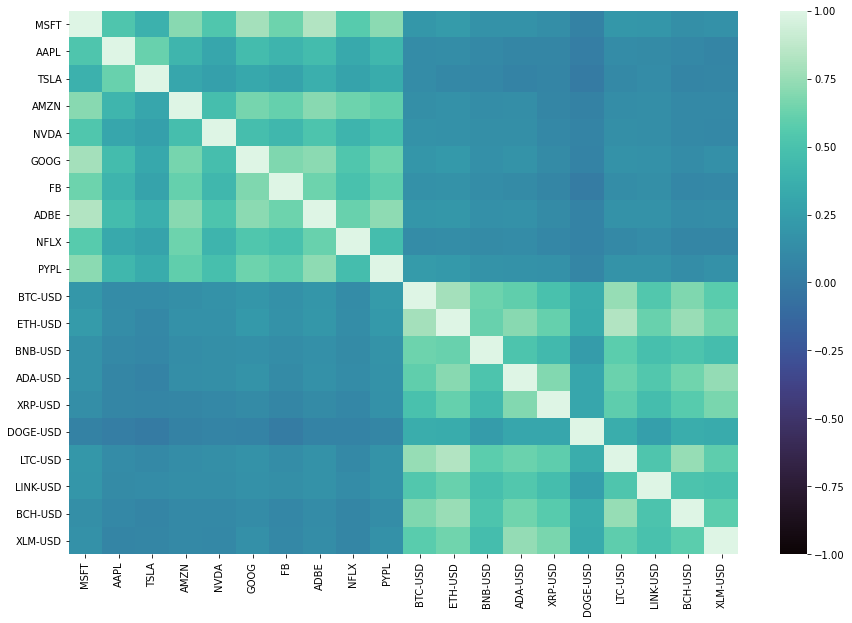

In [48]:
#heatmap to visulalize correlation
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(price_correlation, vmin=-1, vmax=1, cmap="mako", ax=ax)